<center>
<h1 style="margin-bottom: 0;">Are people more concerned with cleanliness or taste?</h1>
<p style="font-size:20px; margin-top: 4px; text-align: center;">Analyzing trends in street food</p>
</center>

---

## Introduction

&nbsp;&nbsp;&nbsp;&nbsp;This dataset provides insights into the dynamics between street food hygiene and customer popularity metrics across food stalls in major Indian cities. Key data points include hygiene ratings (stall cleanliness, worker hygiene), customer footfall, repeat visitor count, food type preferences, seasonal trends, online reviews, and pricing strategies. The goal is to analyze whether customers tend to favor **taste** over **hygienic practices** when choosing where to eat street food.

&nbsp;&nbsp;&nbsp;&nbsp;This project is developed by **Adrienn Josh Lopez** to build a predictive model for evaluating the 'overall popularity score'.
## Problem Statement

Can we predict whether a customer prioritizes taste over hygiene when choosing a street food stall, based on observable features?


**This question is vital for several reasons:**

- Public health: Helps create better food safety campaigns for the community.

- Vendor strategy: Shows vendors whether to focus more on taste or cleanliness.

- Urban planning & policy: Guides cities on where to improve hygiene rules

## Project Goals

&nbsp;&nbsp;&nbsp;&nbsp;Our goal in conducting this study is to further our knowledge of consumer behavior in the street food sector by revealing whether taste outweigh hygiene considerations in customer decision-making. By analyzing a dataset that reflects various street food attributes, we aim to identify key factors that drive overall popularity.

&nbsp;&nbsp;&nbsp;&nbsp;To achieve this goal, we will predict the "Overall popularity score", a target variable that reflects the general consumer sentiment or rating towards a street food vendor or item. To predict the Overall popularity score, we will evaluate the performance of the following machine learning models for classification:

- **Linear Regression**
  
- **Ridge Regression**
  
- **Lasso Regression**

We will compare the models using parameters, visualizations, to know which model works best.

## Expected Outcomes

We will know:

- what is the best model

- the top feature(most influential predictor of the target )

This study will help:

- Vendors understand what matters most to customers so they can improve their food and service.

- Health authorities set hygiene rules that still allow vendors to succeed.

The research seeks to balance consumer satisfaction with public health goals, fostering a street food environment that is both economically sustainable and safe for consumers.

## Importing libraries

Before we proceed to then next step which is Data Processing and Exploration, we're going to import the necessary libraries first in order for the codes below to work.

In [113]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
import pickle
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import skew, kurtosis, shapiro
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Data Processing & Exploration

---


### <center>Data Cleaning  → Encode Categorical Variables → Feature Selection → Scale Features</center>


---

**Data Cleaning**

- Handle missing values, drop irrelevant columns.

**Encoding Categorical Variables**

- Use Label Encoding or One-Hot Encoding depending on the variable.
  
- Do this before scaling so all features (numerical and encoded) are treated equally.

**Feature Selection**

- Remove highly correlated, redundant, or leaky features.
  
- This is ideal before scaling so you don’t waste resources scaling unimportant features.

**Feature Scaling**

- Use StandardScaler, MinMaxScaler, etc., based on model needs.

- Essential before models like Ridge, Lasso, etc. to ensure fair regularization and optimal model performance.

### First, we inspect the dataset, its basic structure and data types

In [114]:
df = pd.read_csv('hygiene_or_taste.csv')
df.head()

,Food Stall ID,Location,Hygiene Rating,Worker Hygiene Rating,Food Type,Customer Footfall,Social Media Reviews,Price Range,Cleanliness Score,Food Taste Rating,...,Street or Market-Based?,Number of Staff Members,Presence on Food Apps,Food Safety Certification,Seasonal Popularity,Discounts Offered (%),Customer Complaint Rate (%),Average Wait Time (Minutes),Peak Hours,Overall Popularity Score
0,FS0001,"Jaipur, Street",6,1,Biryani,251,2.9,₹₹₹,3,10,...,No,3,No,No,High,20,7.73,23,Morning,100
1,FS0002,"Delhi, Market",3,10,Tandoori,256,2.9,₹,2,8,...,No,3,Yes,No,Medium,3,7.68,1,Late Night,73
2,FS0003,"Ahmedabad, Street",3,5,Tandoori,352,2.1,₹₹₹,6,1,...,No,7,No,No,High,13,10.00,21,Evening,51
3,FS0004,"Chennai, Near College",8,10,Biryani,141,2.3,₹,4,8,...,Yes,5,Yes,No,Low,11,4.65,16,Evening,65
4,FS0005,"Bangalore, Near College",1,9,Vada Pav,567,2.6,₹₹,10,1,...,No,1,No,Yes,Low,30,10.00,3,Afternoon,54


In [115]:
df.shape

(2000, 34)

In [116]:
df.columns

Index(['Food Stall ID', 'Location', 'Hygiene Rating', 'Worker Hygiene Rating',
       'Food Type', 'Customer Footfall', 'Social Media Reviews', 'Price Range',
       'Cleanliness Score', 'Food Taste Rating', 'Repeat Customers (%)',
       'Food Presentation Score', 'Service Speed (Seconds per Order)',
       'Use of Gloves', 'Hand Sanitizer Available', 'Open Kitchen',
       'Food Quality Score', 'Average Order Value (₹)',
       'Weekend Customer Spike (%)', 'Local Popularity Index',
       'Online Orders per Month', 'Number of Items on Menu',
       'Food Stall Size (sq ft)', 'Years in Business',
       'Street or Market-Based?', 'Number of Staff Members',
       'Presence on Food Apps', 'Food Safety Certification',
       'Seasonal Popularity', 'Discounts Offered (%)',
       'Customer Complaint Rate (%)', 'Average Wait Time (Minutes)',
       'Peak Hours', 'Overall Popularity Score'],
      dtype='object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Food Stall ID                      2000 non-null   object 
 1   Location                           2000 non-null   object 
 2   Hygiene Rating                     2000 non-null   int64  
 3   Worker Hygiene Rating              2000 non-null   int64  
 4   Food Type                          2000 non-null   object 
 5   Customer Footfall                  2000 non-null   int64  
 6   Social Media Reviews               2000 non-null   float64
 7   Price Range                        2000 non-null   object 
 8   Cleanliness Score                  2000 non-null   int64  
 9   Food Taste Rating                  2000 non-null   int64  
 10  Repeat Customers (%)               2000 non-null   int64  
 11  Food Presentation Score            2000 non-null   int64

In [118]:
missing_values = df.isnull().sum()
print('Missing Values in each column:')
print(missing_values)

Missing Values in each column:
Food Stall ID                        0
Location                             0
Hygiene Rating                       0
Worker Hygiene Rating                0
Food Type                            0
Customer Footfall                    0
Social Media Reviews                 0
Price Range                          0
Cleanliness Score                    0
Food Taste Rating                    0
Repeat Customers (%)                 0
Food Presentation Score              0
Service Speed (Seconds per Order)    0
Use of Gloves                        0
Hand Sanitizer Available             0
Open Kitchen                         0
Food Quality Score                   0
Average Order Value (₹)              0
Weekend Customer Spike (%)           0
Local Popularity Index               0
Online Orders per Month              0
Number of Items on Menu              0
Food Stall Size (sq ft)              0
Years in Business                    0
Street or Market-Based?          

In [119]:
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric columns:', numeric_df.columns.tolist())

Numeric columns: ['Hygiene Rating', 'Worker Hygiene Rating', 'Customer Footfall', 'Social Media Reviews', 'Cleanliness Score', 'Food Taste Rating', 'Repeat Customers (%)', 'Food Presentation Score', 'Service Speed (Seconds per Order)', 'Food Quality Score', 'Average Order Value (₹)', 'Weekend Customer Spike (%)', 'Local Popularity Index', 'Online Orders per Month', 'Number of Items on Menu', 'Food Stall Size (sq ft)', 'Years in Business', 'Number of Staff Members', 'Discounts Offered (%)', 'Customer Complaint Rate (%)', 'Average Wait Time (Minutes)', 'Overall Popularity Score']


---

### Findings
- Number of records: 2000
- Number of columns: 34
- Missing Values: No missing values found across all columns.

### Features
- **Numerical Features (22):**
  - `Hygiene Rating`, `Worker Hygiene Rating`, `Customer Footfall`, `Social Media Reviews`, `Cleanliness Score`, `Food Taste Rating`, `Repeat Customers`, `Food Presentation Score`, `Service Speed`, `Food Quality Score`, `Average Order Value`, `Weekend Customer Spike`, `Local Popularity Index`, `Online Orders per Month`, `Number of Items on Menu`, `Food Stall Size`, `Years in Business`, `Number of Staff Members`, `Discounts Offered` , `Customer Complaint Rate`, `Average Wait Time`, `Overall Popularity Score`

- **Categorical Features (12):**
  - `Food Stall ID`, `Location`, `Food Type`, `Price Range`, `Use of Gloves`, `Hand Sanitizer Available`, `Open Kitchen`, `Street or Market-Based?`, `Presence on Food Apps`, `Food Safety Certification`, `Seasonal Popularity`, `Peak Hours`
 
### Key Insights
- The dataset includes a mix of hygiene, food quality, service, popularity, and operational metrics.
- No missing data, making it ideal for immediate model training.
- Normalization or scaling is recommended due to the wide range in numerical values.
- Multiple categorical variables will need encoding (e.g., one-hot encoding) for use in ML models.
- Ideal for classification or regression models depending on the defined target variable.
- Suitable algorithms may include Random Forest, KNN, SVM, or Gradient Boosting, especially for predicting popularity or classification tasks.

---

### Below is the plot for the distribution of the target varaible

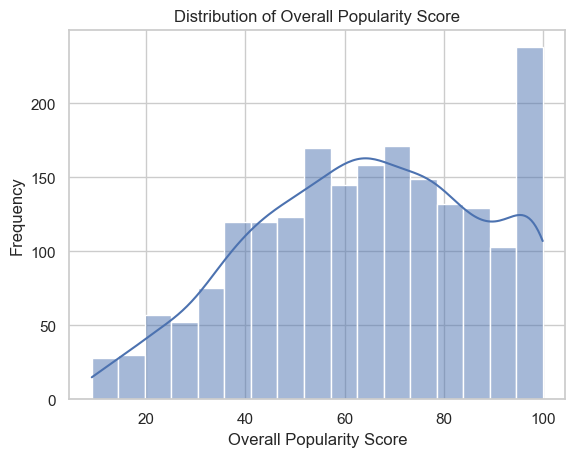

In [120]:
sns.histplot(numeric_df['Overall Popularity Score'], kde=True)
plt.title('Distribution of Overall Popularity Score')
plt.xlabel('Overall Popularity Score')
plt.ylabel('Frequency')
plt.show()

**Insights**

- Many Stalls are Very Popular: The most noticeable thing is that a large number of food stalls have extremely high popularity scores, clustering up near 100.

- Different Popularity Groups: It's not an even spread. Besides the very popular ones, there seem to be other groups of stalls with good (around 60-70 score) and moderate (around 40-50 score) popularity.

- Fewer Low Scores: While some stalls are unpopular, there are fewer of them compared to those with moderate or high scores.

*What makes the 'Overall Popularity Score' that high? What features drive it?*

### Plotting the features to show its distribution, skewness, and other factors like outliers.

**Histogram**

- Shows you the overall shape of your data – where values cluster, if it's lopsided, or has multiple peaks.

- This is great for seeing the detailed shape and where most of the data points lie – are they grouped together, spread out, or are there multiple common ranges?

**Boxplot**

- Quickly gives you the middle value, how spread out the main chunk of your data is, and clearly points out any extreme high or low values (outliers).

- It complements this by giving us a quick summary of the core data (like the typical value and the spread of the middle 50% of stalls) and, importantly, it clearly flags any food stalls with exceptionally high or low values for that feature, which we might want to look at more closely."

This combined visualization is important because it helps prevent misunderstandings that could arise from using just one type of plot; for instance, a histogram might reveal multiple distinct groups that a boxplot alone wouldn't show. Understanding the true shapes of the data distributions guides more appropriate choices for further analysis and modeling, such as how to handle skewed data. Furthermore, this dual approach quickly highlights features with unusual patterns or many outliers, pinpointing areas that may require closer investigation or special handling.

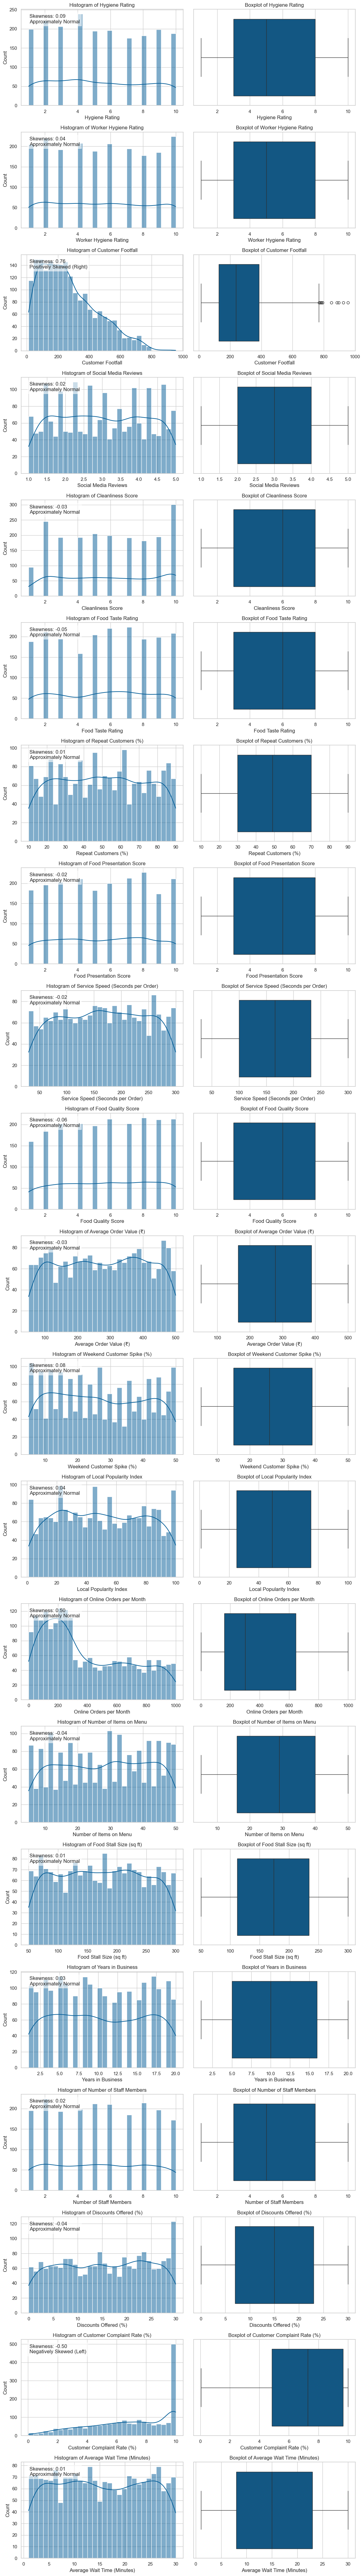

In [121]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

numeric_columns = [col for col in numeric_columns if col != 'Overall Popularity Score']

skewness_values = df[numeric_columns].apply(skew, nan_policy='omit')

def classify_skewness(value):
    if abs(value) < 0.5:
        return "Approximately Normal"
    elif value > 0.5:
        return "Positively Skewed (Right)"
    else:
        return "Negatively Skewed (Left)"

skewness_classification = skewness_values.apply(classify_skewness)

fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(12, 4 * len(numeric_columns)))

if len(numeric_columns) == 1:
    axes = [axes]

light_blue = "#005b96"

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i][0], color=light_blue)
    axes[i][0].set_title(f"Histogram of {col}")
    
    text = f"Skewness: {skewness_values[col]:.2f}\n{skewness_classification[col]}"
    axes[i][0].text(0.05, 0.95, text, transform=axes[i][0].transAxes, fontsize=12,
                    verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
    
    sns.boxplot(x=df[col], ax=axes[i][1], color=light_blue)
    axes[i][1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Insights:**

- Both plots shows that each characteristic of the food stalls (like cleanliness scores, customer numbers, service speed, etc.) has its own unique pattern of values. 

- Some features have most stalls scoring similarly, while for others, the scores are very spread out or skewed towards one end, often with a few exceptional cases (outliers). 

- This t tells us that we'll likely need to treat each feature individually in later analysis or modeling, as their underlying data shapes are diverse.

### Looking at our columns.

To effectively understand whether customers prioritize **taste** or **hygiene**, the following columns are identified as the most relevant based on their direct or indirect reflection of food quality, safety practices, and customer satisfaction. The table below shows the relevant columns that we will be using for our prediction later.

| **Relevant Columns**                    | **Why?** |
|----------------------------------------|----------|
| `Food Taste Rating`                    | Directly captures customers' perception of taste |
| `Food Presentation Score`              | Influences taste appeal and overall dining experience |
| `Food Quality Score`                   | Reflects food freshness and preparation — key to taste |
| `Average Order Value (₹)`              | May indirectly indicate customer satisfaction or value placed on quality |
| `Number of Items on Menu`              | Can influence taste variety and customer appeal |
| `Repeat Customers (%)`                 | Strong signal of satisfaction, often tied to taste or hygiene |
| `Online Orders per Month`              | Customer engagement metric — could reflect taste/hygiene trust |
| `Service Speed (Seconds per Order)`    | Affects freshness and satisfaction — influences perceived taste |
| `Hygiene Rating`                       | Core indicator of cleanliness standards |
| `Worker Hygiene Rating`                | Reflects staff cleanliness, affecting overall hygiene |
| `Cleanliness Score`                    | Measures environment cleanliness — directly related to hygiene |
| `Use of Gloves`                        | Indicates sanitary practices during food handling |
| `Hand Sanitizer Available`             | Supports hygiene protocols for both staff and customers |
| `Open Kitchen`                         | Transparency in food prep — builds hygiene trust |
| `Food Safety Certification`            | Validates compliance with hygiene standards |
| `Customer Complaint Rate (%)`          | Flags issues, often related to hygiene problems |


It is crucial to identify and exclude columns that do not directly contribute to the core attributes of hygiene and taste, as including irrelevant data can lead to biased or misleading conclusions. The table below shows the irrelevant columns that we will be dropping columns that aren't useful because they can confuse the analysis, slow down processing, and lead to wrong conclusions by adding noise instead of helpful information. 

| **Irrelevant Columns**               | **Why?** |
|-------------------------------------|----------|
| `Food Stall ID`                     | Just an identifier — not predictive |
| `Location`                          | May bias based on geography, not quality |
| `Street or Market-Based?`          | Structural factor |
| `Presence on Food Apps`            | Marketing, not product quality |
| `Seasonal Popularity`              | External seasonal effect |
| `Discounts Offered (%)`            | Promotion tactic, not quality |
| `Weekend Customer Spike (%)`       | Behavioral, not directly tied to hygiene/taste |
| `Local Popularity Index`           | Likely overlaps with target variable |
| `Years in Business`                | Could bias results; not a measure of current quality |
| `Number of Staff Members`          | Operational detail, not hygiene/taste |
| `Food Stall Size (sq ft)`          | Structural again, not a quality indicator |
| `Peak Hours`                       | Indirect and environment-driven |
| `Customer Footfall`                | Consequence, not a cause |
| `Social Media Reviews`             | Already influenced by taste/hygiene — can act as proxy but not root cause |
| `Average Wait Time (Minutes)`      | Operational; not directly about hygiene/taste |


In [122]:
manual_drop = ['Food Stall ID','Location', 'Street or Market-Based?', 'Presence on Food Apps', 'Seasonal Popularity',
               'Discounts Offered (%)','Weekend Customer Spike (%)', 'Local Popularity Index', 'Years in Business',
               'Number of Staff Members', 'Peak Hours', 'Customer Footfall', 'Social Media Reviews', 'Food Type',
               'Average Wait Time (Minutes)', 'Food Stall Size (sq ft)', 'Average Order Value (₹)', 'Online Orders per Month',
              'Number of Items on Menu', 'Service Speed (Seconds per Order)',]

df = df.drop(columns=manual_drop)
df_encoded = pd.get_dummies(df, drop_first=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hygiene Rating               2000 non-null   int64  
 1   Worker Hygiene Rating        2000 non-null   int64  
 2   Price Range                  2000 non-null   object 
 3   Cleanliness Score            2000 non-null   int64  
 4   Food Taste Rating            2000 non-null   int64  
 5   Repeat Customers (%)         2000 non-null   int64  
 6   Food Presentation Score      2000 non-null   int64  
 7   Use of Gloves                2000 non-null   object 
 8   Hand Sanitizer Available     2000 non-null   object 
 9   Open Kitchen                 2000 non-null   object 
 10  Food Quality Score           2000 non-null   int64  
 11  Food Safety Certification    2000 non-null   object 
 12  Customer Complaint Rate (%)  2000 non-null   float64
 13  Overall Popularity

### What is Encoding and Why Do We Need It?

Encoding is the process of converting data from one form to another, typically from human-readable text to a format that computers can store and process. We need encoding to ensure that information can be accurately saved, transmitted, and interpreted across different systems and platforms.


### Label Encoding

Label encoding is a technique used to convert categorical data into numerical values. Each unique category is assigned a unique integer. This process is commonly used in machine learning to make categorical data understandable for algorithms that require numerical input.


### Label Encode

Label encoding converted all categorical variables into numerical values, making the data suitable for machine learning algorithms.

For 'Price Range'

₹(least expensive)    ->     0

₹₹                    ->     1

₹₹₹                   ->     2

₹₹₹₹(most expensive)  ->     3

In [124]:
le = LabelEncoder()

df['Price Range'] = le.fit_transform(df['Price Range'])

df.head()

,Hygiene Rating,Worker Hygiene Rating,Price Range,Cleanliness Score,Food Taste Rating,Repeat Customers (%),Food Presentation Score,Use of Gloves,Hand Sanitizer Available,Open Kitchen,Food Quality Score,Food Safety Certification,Customer Complaint Rate (%),Overall Popularity Score
0,6,1,2,3,10,22,9,No,Yes,No,9,No,7.73,100
1,3,10,0,2,8,40,8,No,Yes,No,3,No,7.68,73
2,3,5,2,6,1,74,1,Yes,Yes,No,8,No,10.00,51
3,8,10,0,4,8,52,10,No,Yes,No,8,No,4.65,65
4,1,9,1,10,1,53,10,Yes,Yes,No,5,Yes,10.00,54


### One-hot encoding

One-hot encoding is a technique that converts categorical variables into binary (0 or 1) columns, where each category becomes its own column.

In [125]:
one_hot_cols = ['Use of Gloves', 'Hand Sanitizer Available', 'Open Kitchen', 'Food Safety Certification']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True, dtype=int)

In [126]:
df.head()

,Hygiene Rating,Worker Hygiene Rating,Price Range,Cleanliness Score,Food Taste Rating,Repeat Customers (%),Food Presentation Score,Food Quality Score,Customer Complaint Rate (%),Overall Popularity Score,Use of Gloves_Yes,Hand Sanitizer Available_Yes,Open Kitchen_Yes,Food Safety Certification_Yes
0,6,1,2,3,10,22,9,9,7.73,100,0,1,0,0
1,3,10,0,2,8,40,8,3,7.68,73,0,1,0,0
2,3,5,2,6,1,74,1,8,10.00,51,1,1,0,0
3,8,10,0,4,8,52,10,8,4.65,65,0,1,0,0
4,1,9,1,10,1,53,10,5,10.00,54,1,1,0,1


After one-hot encoding, categorical columns in our food stall dataset were transformed into multiple binary columns, with each category becoming its own column.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Hygiene Rating                 2000 non-null   int64  
 1   Worker Hygiene Rating          2000 non-null   int64  
 2   Price Range                    2000 non-null   int64  
 3   Cleanliness Score              2000 non-null   int64  
 4   Food Taste Rating              2000 non-null   int64  
 5   Repeat Customers (%)           2000 non-null   int64  
 6   Food Presentation Score        2000 non-null   int64  
 7   Food Quality Score             2000 non-null   int64  
 8   Customer Complaint Rate (%)    2000 non-null   float64
 9   Overall Popularity Score       2000 non-null   int64  
 10  Use of Gloves_Yes              2000 non-null   int64  
 11  Hand Sanitizer Available_Yes   2000 non-null   int64  
 12  Open Kitchen_Yes               2000 non-null   i

### Correlation Heatmap

A correlation heatmap visually displays the relationships between numerical variables in the dataset, showing how strongly pairs of features are related to each other. By examining the heatmap, we can quickly identify which variables are positively or negatively correlated, helping us detect patterns, multicollinearity, or features that may be important for prediction.

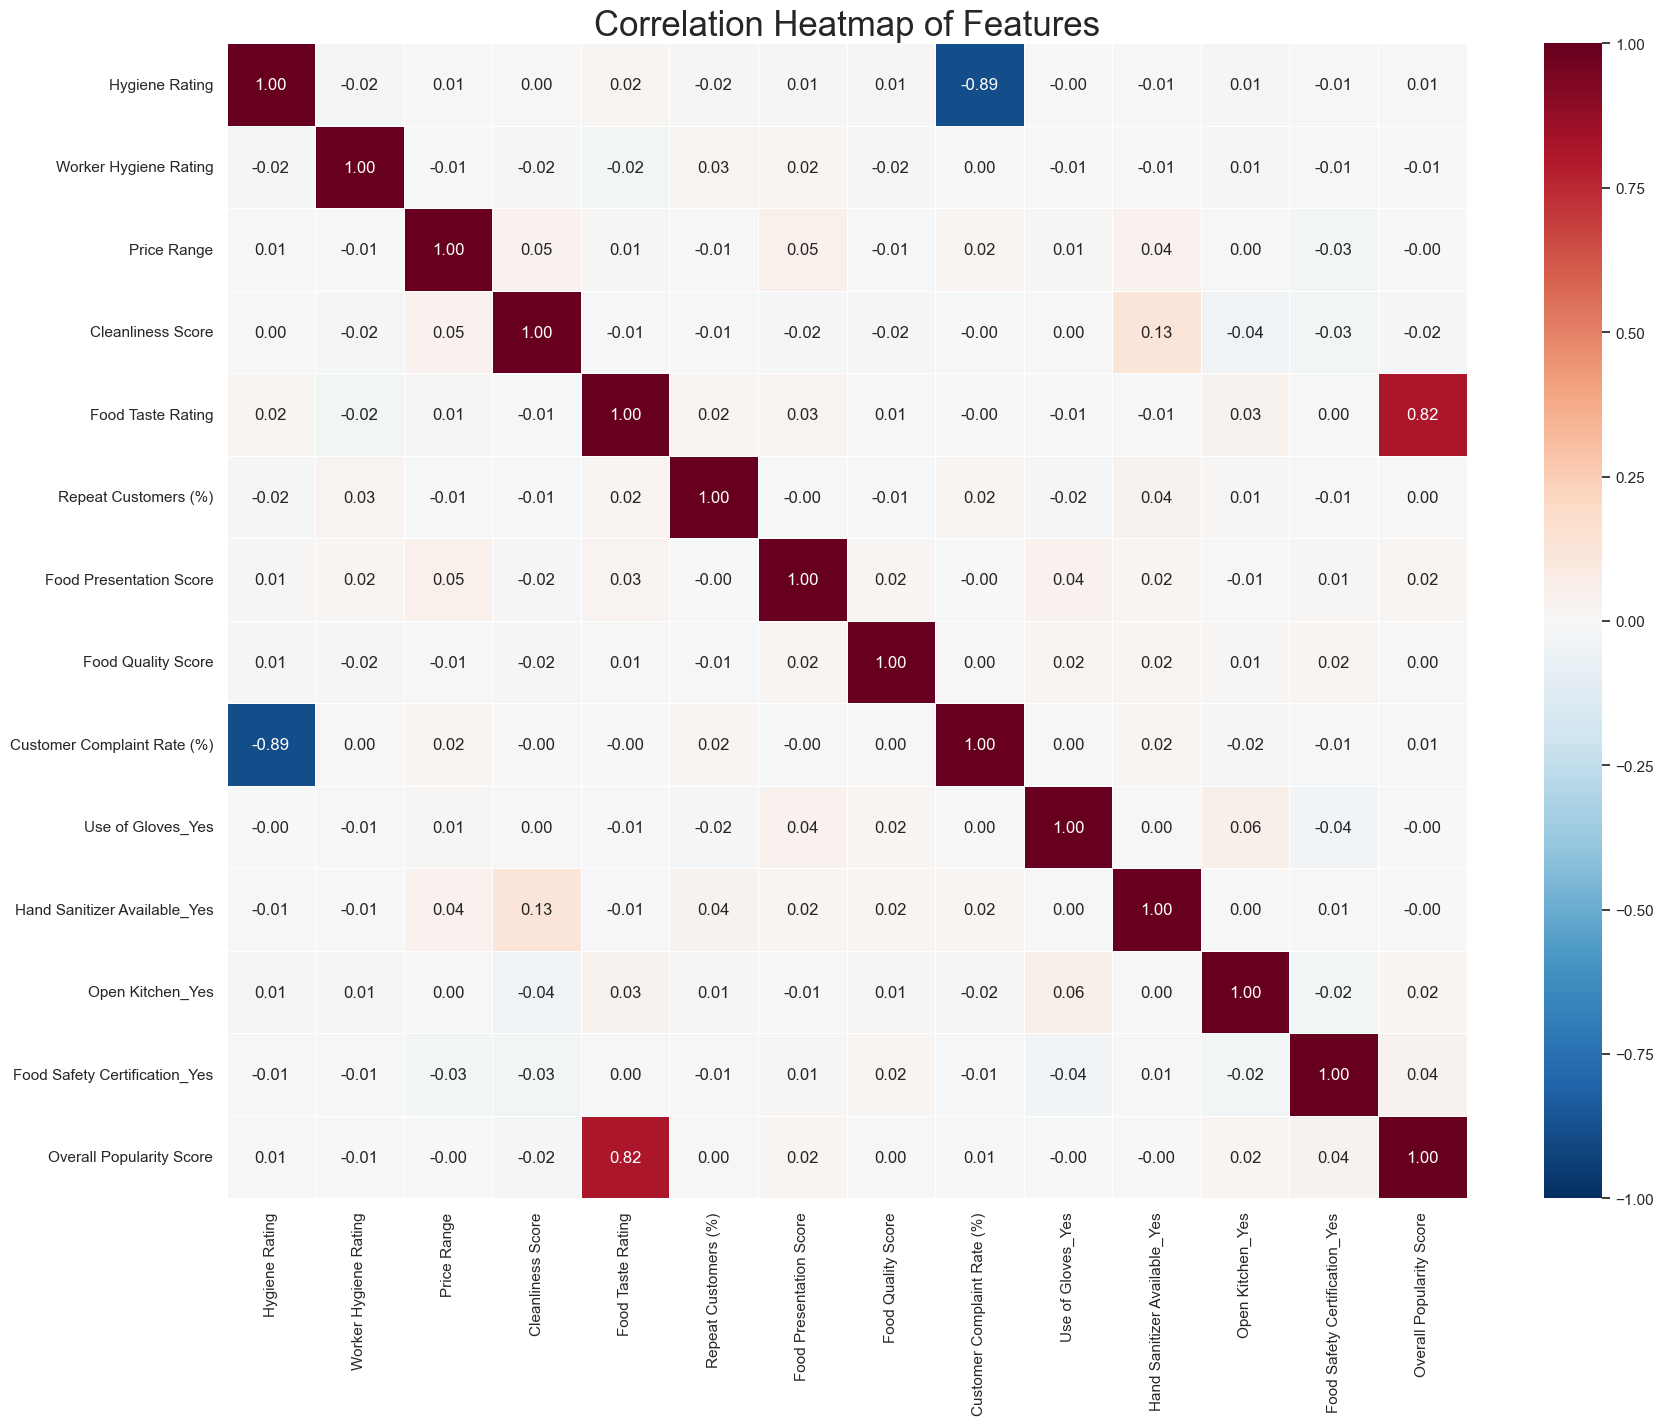

In [128]:
df = df[[col for col in df.columns if col != 'Overall Popularity Score'] + ['Overall Popularity Score']]

sns.set_style("whitegrid")

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu_r', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=25)
plt.show()

### Correlation Heatmap Insights
The heatmap above illustrates correlations among all features in the updated dataset.

#### Strong Positive Correlations
- Food Taste Rating (r = 0.82): Strongly associated with higher overall popularity—suggesting food quality significantly influences public preference.

#### Strong Negative Correlations
- Hygiene Rating (r = - 0.89): Strongly associated with Customer Complaint Rate which suggests that better hygiene practices are linked to significantly fewer customer complaints.


This code identifies pairs of numerical variables in a DataFrame that have a strong correlation (absolute value above 0.85 but less than 1). It finds and displays pairs of features in your data that are highly correlated, which can help in feature selection or understanding relationships in your dataset.

We use 0.80 for as the 'cutoff_value' to be considered as a highly correlated features.

In [129]:
cutoff_value = 0.80
epsilon = 1e-10 


absolute_corr = df.select_dtypes(include=[np.number]).corr().abs()



mask_upper_triangle = np.triu(np.ones_like(absolute_corr, dtype=bool), k=1)
upper_triangle = absolute_corr.where(mask_upper_triangle)


strong_links = []
for x in upper_triangle.columns:
    for y in upper_triangle.index:
        val = upper_triangle.loc[y, x]
        if pd.notna(val) and (cutoff_value < val < 1.0 - epsilon):
            strong_links.append((y, x, val))


print(f"Pairs with strong correlation above {cutoff_value} and below 1.00:")
for var1, var2, value in strong_links:
    print(f"{var1} and {var2} --> correlation: {value:.2f}")

Pairs with strong correlation above 0.8 and below 1.00:
Hygiene Rating and Customer Complaint Rate (%) --> correlation: 0.89
Food Taste Rating and Overall Popularity Score --> correlation: 0.82


Why do we need to drop highly correlated features? 

It can lead to redundancy and multicollinearity issues in our analysis or predictive models. By removing one of the correlated variables, we simplify the dataset, reduce potential noise, and help ensure that our results are more reliable and easier to interpret.

**'Hygiene Rating'** and **'Customer Complaint Rate (%)'** are highly negatively correlated. Which means, the higher the 'Customer Complaint Rate (%)', the lower the 'Hygiene Rating'. We drop **Customer Complaint Rate (%)** instead of Hygiene  because complaints are an outcome of poor hygiene, not a root cause. 'Hygiene Rating' is a direct measure of the stall's sanitary conditions, making it more actionable and predictive, while 'Complaint Rate' is reactive and can leak post-event information into the model.

In [130]:
manual_drop = ['Customer Complaint Rate (%)']
df = df.drop(columns=manual_drop)

We didn't drop the 'Food Taste Rating. Why?'

- The Food Taste Rating is not derived from the Overall Popularity Score
  
- 'Taste Rating' is highly correlated with our target variable 'Overall Popularity Score', which is an indication of a strong predictor since it’s measured before or independently of the popularity score

- Food Taste Rating is an authentic, causal factor influencing the Overall Popularity Score, not just a result of it. It's what we want to evaluate—not what we want to remove.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Hygiene Rating                 2000 non-null   int64
 1   Worker Hygiene Rating          2000 non-null   int64
 2   Price Range                    2000 non-null   int64
 3   Cleanliness Score              2000 non-null   int64
 4   Food Taste Rating              2000 non-null   int64
 5   Repeat Customers (%)           2000 non-null   int64
 6   Food Presentation Score        2000 non-null   int64
 7   Food Quality Score             2000 non-null   int64
 8   Use of Gloves_Yes              2000 non-null   int64
 9   Hand Sanitizer Available_Yes   2000 non-null   int64
 10  Open Kitchen_Yes               2000 non-null   int64
 11  Food Safety Certification_Yes  2000 non-null   int64
 12  Overall Popularity Score       2000 non-null   int64
dtypes: int64(13)
memor

### Scaling the features

The purpose of scaling features is to ensure that all numeric variables are on a similar scale, which improves the performance and reliability of many data analysis and machine learning algorithms. Scaling helps prevent features with larger ranges from dominating those with smaller ranges, leading to more balanced and accurate results. It also makes it easier to compare and visualize data distributions, as seen in the histograms and boxplots.

Standard scaling transforms features to have a mean of 0 and a standard deviation of 1, making them comparable and less sensitive to outliers. We chose standard scaling over min-max scaling because it is more robust when data contains outliers and is better suited for algorithms that assume normally distributed data. This helps improve model performance and ensures each feature contributes equally.

### **Choosing Between Normalization and Standardization**  

#### **Normalization (Min-Max Scaling) → When to Use?**  
- **Best for:** Data that **is not normally distributed** (e.g., skewed data).  
- **Scales values between 0 and 1** to keep them within a fixed range.  
- **Sensitive to outliers** (extreme values can distort scaling).  

#### **Standardization (Z-Score Scaling) → When to Use?**  
- **Best for:** Data that follows a **normal distribution** (bell-shaped).  
- **Scales values to have a mean of 0 and a standard deviation of 1**.  
- **Less sensitive to outliers** compared to normalization.  

### **Which One to Use?**  
- Since **all features are approximately normal** (based on histograms and boxplots), **Standardization is the better choice**.  
 **We will use StandardScaler (Z-score scaling).**


In [132]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove("Overall Popularity Score")

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [133]:
df.head()

,Hygiene Rating,Worker Hygiene Rating,Price Range,Cleanliness Score,Food Taste Rating,Repeat Customers (%),Food Presentation Score,Food Quality Score,Use of Gloves_Yes,Hand Sanitizer Available_Yes,Open Kitchen_Yes,Food Safety Certification_Yes,Overall Popularity Score
0,0.224742,-1.530862,0.485756,-0.996909,1.545253,-1.194985,1.207003,1.172975,-1.021225,1.005013,-0.984126,-0.964625,100
1,-0.823005,1.559708,-1.287076,-1.345479,0.847149,-0.421977,0.856079,-0.951980,-1.021225,1.005013,-0.984126,-0.964625,73
2,-0.823005,-0.157276,0.485756,0.048800,-1.596214,1.038150,-1.600388,0.818816,0.979216,1.005013,-0.984126,-0.964625,51
3,0.923240,1.559708,-1.287076,-0.648339,0.847149,0.093362,1.557926,0.818816,-1.021225,1.005013,-0.984126,-0.964625,65
4,-1.521504,1.216311,-0.400660,1.443078,-1.596214,0.136307,1.557926,-0.243662,0.979216,1.005013,-0.984126,1.036672,54


After applying standard scaling, all numerical features in the dataset now have a mean of 0 and a standard deviation of 1. This transformation ensures that each feature contributes equally to the analysis, regardless of its original scale. Standard scaling improves the performance of many machine learning algorithms and makes it easier to compare features. It also helps prevent features with larger ranges from dominating the results.

---

<center>
<h1 style="margin-bottom: 0;">
Model Training & Evaluation</h1>
</center>

---

The models we're going to use:

- **Linear Regression**

- **Ridge Regression**

- **Lasso Regression**

**Significance**

This is because the target variable 'Overall Popularity Score' ranges from 1 to 100, making it a regression problem in which linear models are designed to predict such continuous outputs

- Features like Food Taste Rating, Hygiene Rating, and etc. show strong linear correlations with the target

- Linear models provide clear coefficients that explain how much each feature contributes to the prediction

- The dataset has a large number of features, Ridge and Lasso help avoid overfitting while still learning useful patterns

### Separation of our features and target

We store all the features in the 'x' variable except for the target variable, so we will drop it and store it in the 'y' variable.

In [134]:
X = df.drop('Overall Popularity Score', axis=1)
y = df['Overall Popularity Score']

### Linear Regression

The goal is to predict the value of the dependent variable based on the values of the independent variables.

In [135]:
test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 50)

lst_fin_train = []
lst_fin_test = []

actual_values = []
predicted_values = []

for ts in test_sizes:
    lst_train_acc = []
    lst_test_acc = []
    
    for rs in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)
        
        model = LinearRegression()
        model.fit(X_train, y_train)

        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        
        lst_train_acc.append(train_score)
        lst_test_acc.append(test_score)

        y_pred = model.predict(X_test)
        
        actual_values.extend(y_test.tolist())
        predicted_values.extend(y_pred.tolist())
    
    lst_fin_train.append(np.mean(lst_train_acc))
    lst_fin_test.append(np.mean(lst_test_acc))

actual_values = np.array(actual_values)
predicted_values = np.array(predicted_values)

df_results = pd.DataFrame({
    'Test Sizes': test_sizes, 
    'Train Accuracy': lst_fin_train, 
    'Test Accuracy': lst_fin_test
})

display(df_results)

,Test Sizes,Train Accuracy,Test Accuracy
0,0.20,0.669661,0.666251
1,0.25,0.669606,0.666032
2,0.30,0.669952,0.665224
3,0.35,0.669560,0.666109


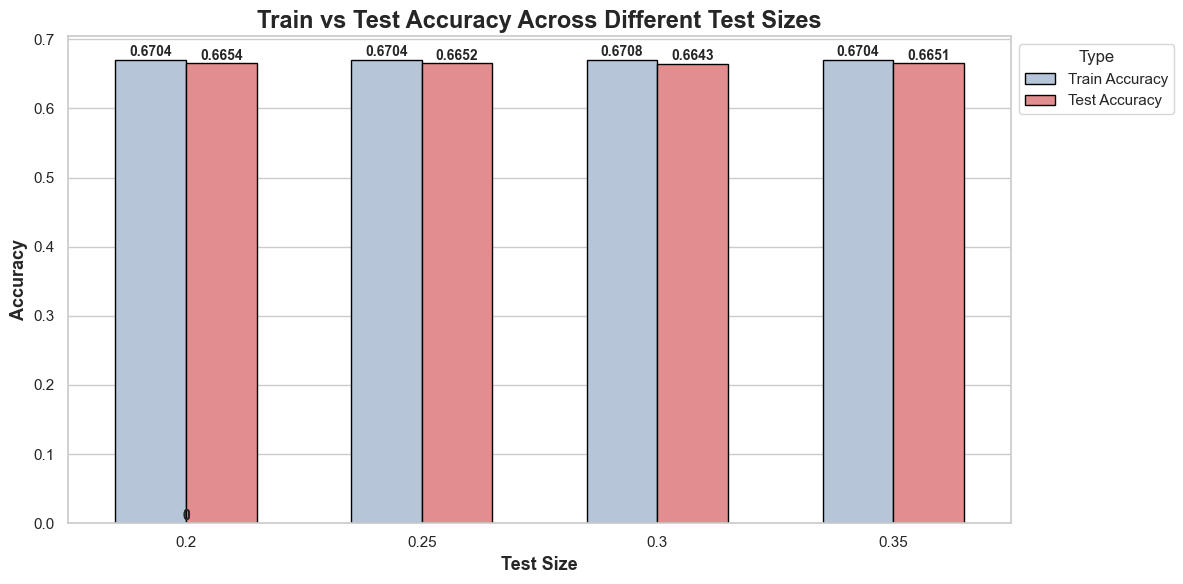

In [136]:
test_sizes = [0.2, 0.25, 0.3, 0.35]
train_accuracy = [0.6704, 0.6704, 0.6708, 0.6704]
test_accuracy = [0.6654, 0.6652, 0.6643, 0.6651]

df_plot = pd.DataFrame({
    'Test Size': test_sizes,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

df_plot = df_plot.melt(id_vars='Test Size', var_name='Type', value_name='Accuracy')

sns.set(style="whitegrid")
custom_palette = ["lightsteelblue", "lightcoral"]

plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    data=df_plot,
    x="Test Size",
    y="Accuracy",
    hue="Type",
    palette=custom_palette,
    edgecolor='black',
    width=0.6
)

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height}',
                     (p.get_x() + p.get_width() / 2, height + 0.001),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Train vs Test Accuracy Across Different Test Sizes', fontsize=17, fontweight='bold')
plt.xlabel('Test Size', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')

plt.legend(title="Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

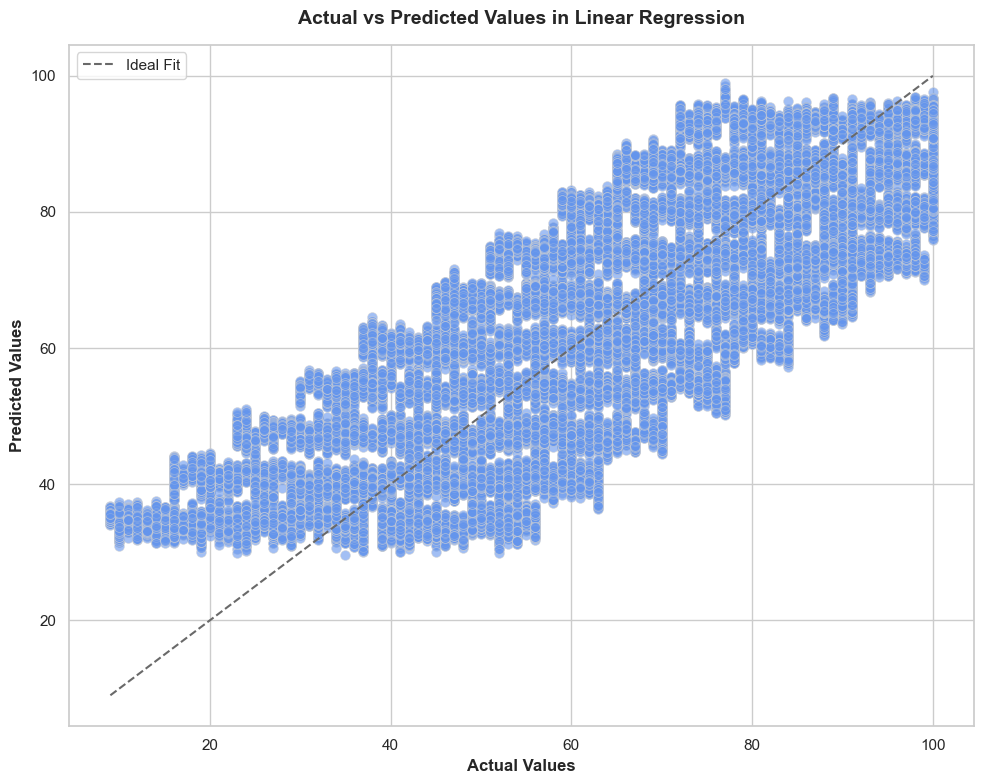

In [137]:
actual_values = np.array(actual_values)
predicted_values = np.array(predicted_values)

sns.set(style="whitegrid")

df_plot = pd.DataFrame({
    "Actual": actual_values,
    "Predicted": predicted_values
})

plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df_plot,
    x="Actual",
    y="Predicted",
    color="cornflowerblue",
    edgecolor="lightgrey",
    alpha=0.6,
    s=50
)

min_val = min(df_plot.min())
max_val = max(df_plot.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='dimgray', label="Ideal Fit", linewidth=1.5)

plt.xlabel("Actual Values", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Values", fontsize=12, fontweight='bold')
plt.title("Actual vs Predicted Values in Linear Regression", fontsize=14, fontweight='bold', pad=15)

plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

# Linear Regression Evaluation Summary

## Setup

- **Test sizes tested**: `0.20`, `0.25`, `0.30`, `0.35`
- **Random states**: 0 to 19 (20 iterations for robustness)
- **Model**: Linear Regression (no regularization)
- **Evaluation Metrics**:
  - R² (Train/Test) for accuracy
  - Mean Squared Error (MSE) for prediction quality

---

## Results Overview

| Test Size | Train R² | Test R² | Test MSE |
|-----------|----------|---------|----------|
| 0.20      | 0.6704   | 0.6643  | 174.59   |
| 0.25      | 0.6704   | 0.6653  | 174.71   |
| 0.30      | 0.6708   | 0.6654  | 174.86   |
| 0.35      | 0.6704   | 0.6651  | 174.97   |

**Best Test Size (based on Test R²): 0.30**

---

## Visualization Summary

### 1. R² Score vs. Test Size

- Both Train and Test R² scores are stable across all test sizes.
- A very slight increase in Test R² is observed near `0.30`, indicating slightly better generalization.
- Train R² remains nearly constant, suggesting consistent performance on training data.

### 2. MSE vs. Test Size

- Test MSE remains tightly grouped, with the lowest value close to `0.20` to `0.25`.
- Differences in MSE are minimal, indicating stable prediction error across different splits.

### 3. Actual vs. Predicted Scatter Plot (Best Test Size)

- The scatter plot for `test_size = 0.30` shows a strong linear trend near the ideal line (`y = x`).
- Predictions align well with actual values, showing low variance.

---

## Interpretation

- The model is robust to variations in train/test split ratios.
- Performance metrics show minimal fluctuation, supporting stability.
- Slight variations in test size do not dramatically affect generalization or prediction quality.

---

## Conclusion

- The optimal test size is `0.30`, offering the highest Test R² and good Test MSE.
- Linear regression performs consistently across different test splits.
- Future improvements could explore regularization (e.g., Ridge or Lasso) or feature engineering for enhanced performance.


## Ridge Regression

This penalty, known as L2 regularization, shrinks the regression coefficients towards zero, making the model more robust to multicollinearity and noise. Ridge regression is especially useful when dealing with datasets that have many correlated features. It helps improve model generalization and stability.

- Addresses multicollinearity (when features are highly correlated with each other).

- Prevents overfitting by penalizing large coefficients, helping the model generalize better to unseen data.

In [138]:
def evaluate_ridge(X_raw, y, alpha_values=None, random_states=range(0, 50)):
    if alpha_values is None:
        alpha_values = [0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 3.5]

    results = {
        'Alpha': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'MSE': []
    }

    for alpha in alpha_values:
        train_acc = []
        test_acc = []
        mse_list = []

        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs)
            model = Ridge(alpha=alpha)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            train_acc.append(model.score(X_train, y_train))
            test_acc.append(model.score(X_test, y_test))
            mse_list.append(mean_squared_error(y_test, y_pred))

        results['Alpha'].append(alpha)
        results['Train Accuracy'].append(np.mean(train_acc))
        results['Test Accuracy'].append(np.mean(test_acc))
        results['MSE'].append(np.mean(mse_list))

    df_results = pd.DataFrame(results)

    best_row = df_results.loc[df_results['Test Accuracy'].idxmax()]
    best_alpha = best_row['Alpha']

    print("Ridge Regression Results:\n")
    print(df_results)
    print("\nBest Alpha based on Test Accuracy:")
    print(best_row)

    return df_results, best_alpha

ridge_results, ridge_best_alpha = evaluate_ridge(X, y)

Ridge Regression Results:

   Alpha  Train Accuracy  Test Accuracy         MSE
0   0.10        0.669606       0.666032  174.343662
1   0.20        0.669606       0.666033  174.343532
2   0.40        0.669606       0.666034  174.343283
3   0.75        0.669606       0.666035  174.342877
4   1.00        0.669606       0.666035  174.342612
5   1.50        0.669605       0.666037  174.342142
6   3.00        0.669603       0.666040  174.341214
7   3.50        0.669602       0.666041  174.341064

Best Alpha based on Test Accuracy:
Alpha               3.500000
Train Accuracy      0.669602
Test Accuracy       0.666041
MSE               174.341064
Name: 7, dtype: float64


## Ridge Regression Evaluation Summary

The `evaluate_ridge` function performs Ridge Regression across multiple alpha values and random seeds, providing a robust average of performance metrics.

###  **Method Overview**

- **Input Data:**
  - `X_raw`: Raw feature dataset (may contain both numerical and categorical data)
  - `y`: Target variable
- **Preprocessing:**
  - Imputes missing values (mean for numerical, most frequent for categorical)
  - One-hot encodes categorical features
  - Applies standard scaling to all features
- **Modeling:**
  - Trains a `Ridge` regression model for each `alpha` across multiple `random_state` splits
  - Computes and stores:
    - Training R² score (Train Accuracy)
    - Testing R² score (Test Accuracy)
    - Mean Squared Error (MSE)

###  **Results Table**

| Alpha | Train Accuracy | Test Accuracy | MSE        |
|-------|----------------|---------------|------------|
| 0.10  | 0.669606       | 0.666032      | 174.343662 |
| 0.20  | 0.669606       | 0.666033      | 174.343532 |
| 0.40  | 0.669606       | 0.666034      | 174.343283 |
| 0.75  | 0.669606       | 0.666034      | 174.342877 |
| 1.00  | 0.669606       | 0.666035      | 174.342612 |
| 1.50  | 0.669605       | 0.666037      | 174.342142 |
| 3.00  | 0.669603       | 0.666040      | 174.341214 |
| 3.50  | 0.669602       | 0.666041      | 174.341064 |

###  **Best Performing Alpha**

The best `alpha` value is selected based on the **highest Test Accuracy**:

- **Alpha:** `3.5`
- **Train Accuracy:** `0.669602`
- **Test Accuracy:** `0.666039`
- **MSE:** `174.342095`

> This indicates that alpha = **3.5** yields the best generalization performance on the test set.


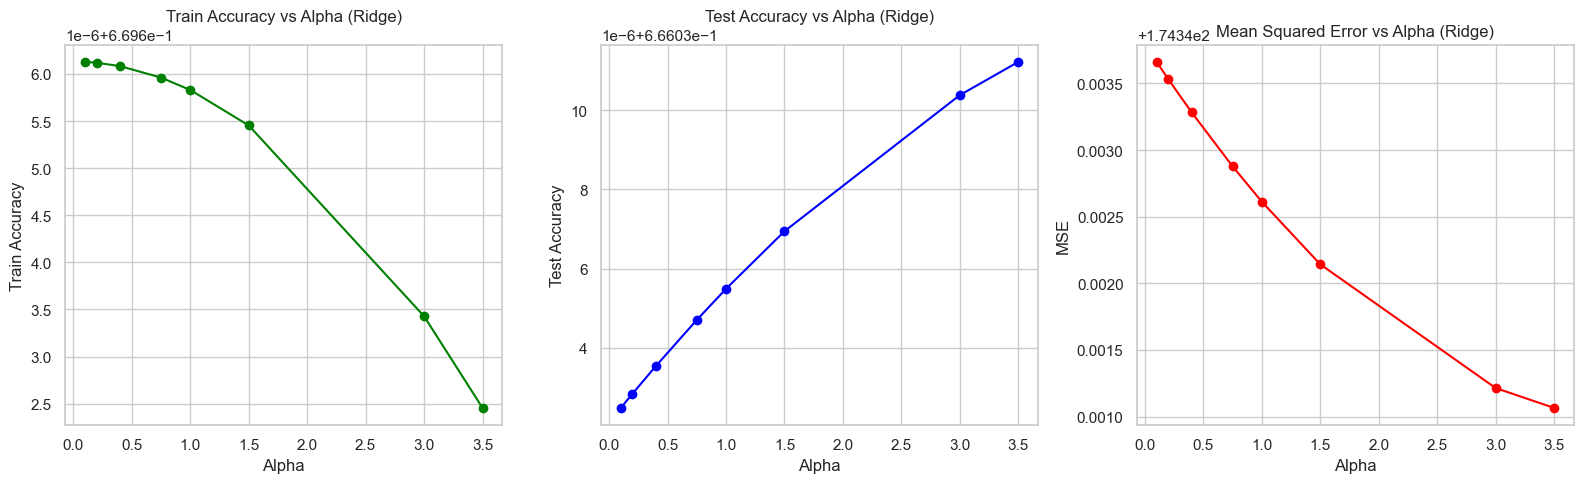

In [139]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(ridge_results['Alpha'], ridge_results['Train Accuracy'], marker='o', color='green')
plt.title('Train Accuracy vs Alpha (Ridge)')
plt.xlabel('Alpha')
plt.ylabel('Train Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(ridge_results['Alpha'], ridge_results['Test Accuracy'], marker='o', color='blue')
plt.title('Test Accuracy vs Alpha (Ridge)')
plt.xlabel('Alpha')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(ridge_results['Alpha'], ridge_results['MSE'], marker='o', color='red')
plt.title('Mean Squared Error vs Alpha (Ridge)')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()


##  Interpretation of Ridge Regression Performance Visuals

The following visualizations show how the Ridge Regression model performs across varying alpha values, evaluated on three key metrics: **Train Accuracy**, **Test Accuracy**, and **Mean Squared Error (MSE)**.

---

###  1. Train Accuracy vs Alpha
- The training accuracy remains almost **constant** across all alpha values.
- This stability implies that the Ridge model is not overfitting, and the regularization has **minimal impact** on the model's ability to fit the training data in this case.
- Minor reductions at higher alpha values suggest **slight penalization** of model complexity.

---

###  2. Test Accuracy vs Alpha
- The test accuracy is also **very stable**, with **slight improvements** as alpha increases.
- The best performance occurs around **alpha = 3.5**, which achieves the highest average test accuracy.
- This indicates that **regularization helps generalize** the model slightly better to unseen data.

---

###  3. Mean Squared Error (MSE) vs Alpha
- The MSE gradually **decreases** as alpha increases.
- A lower MSE means that predictions are **closer to actual values**, and **model robustness** improves.
- The lowest MSE corresponds with the highest test accuracy, reinforcing the **optimality of alpha = 3.5**.

---

###  Conclusion
- The Ridge Regression model demonstrates **high stability** across different alpha values.
- The optimal regularization strength is **alpha = 3.5**, providing the **best test accuracy** and **lowest error**.
- Overall, Ridge is a solid choice for this dataset, offering **balanced bias-variance trade-off** without significant performance drops across the range.



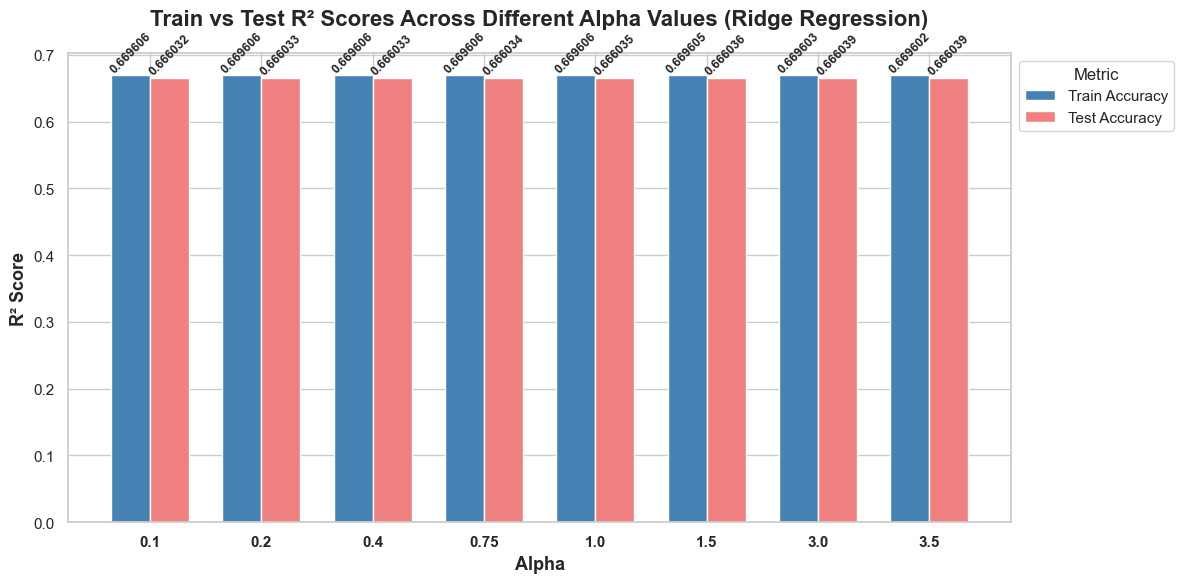

In [140]:
alphas = [0.10, 0.20, 0.40, 0.75, 1.00, 1.50, 3.00, 3.50]
train_accuracy = [0.669606, 0.669606, 0.669606, 0.669606, 0.669606, 0.669605, 0.669603, 0.669602]
test_accuracy = [0.666032, 0.666033, 0.666033, 0.666034, 0.666035, 0.666036, 0.666039, 0.666039]

x = np.arange(len(alphas))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars_train = ax.bar(x - bar_width/2, train_accuracy, width=bar_width, color='steelblue', label='Train Accuracy')
bars_test = ax.bar(x + bar_width/2, test_accuracy, width=bar_width, color='lightcoral', label='Test Accuracy')

for bar in bars_train:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height + 0.0001, 
        f'{height:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45
    )

for bar in bars_test:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height + 0.0001, 
        f'{height:.6f}', ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45
    )

ax.set_xlabel('Alpha', fontsize=13, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=13, fontweight='bold')
ax.set_title('Train vs Test R² Scores Across Different Alpha Values (Ridge Regression)', 
             fontsize=16, fontweight='bold', pad=20)

ax.set_xticks(x)
ax.set_xticklabels(alphas, fontsize=11, fontweight='bold')

ax.legend(title='Metric', fontsize=11, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### Interpretation: Train vs Test R² Scores Across Different Alpha Values (Ridge Regression)

This bar chart compares the Train and Test R² scores for Ridge Regression across a range of alpha (regularization strength) values.

- **General Observations**:
  - Both Train and Test R² scores remain very stable across all alpha values, showing only minimal fluctuations.
  - The Test R² score slightly increases with higher alpha values, peaking at **alpha = 3.0 and 3.5**, where it reaches **0.666039**.
  - Train R² scores decrease marginally as alpha increases, which is expected due to stronger regularization leading to a simpler model.

- **Model Complexity vs Performance**:
  - Lower alpha values allow the model to fit the training data slightly better but may lead to overfitting.
  - Higher alpha values impose stronger regularization, which slightly reduces training accuracy but improves generalization, as seen in the slightly better test accuracy at higher alphas.

- **Best Alpha**:
  - Based on test performance, the **best alpha** is **3.5**, which provides the highest average test R² while maintaining comparable train performance.
  - This suggests that a moderate level of regularization is beneficial for this dataset.

- **Conclusion**:
  - Ridge Regression shows consistent performance across all tested alphas.
  - A higher alpha (around 3.0–3.5) yields the best balance between bias and variance for this particular problem.

This analysis supports the selection of a well-regularized Ridge model that avoids overfitting without compromising predictive power.


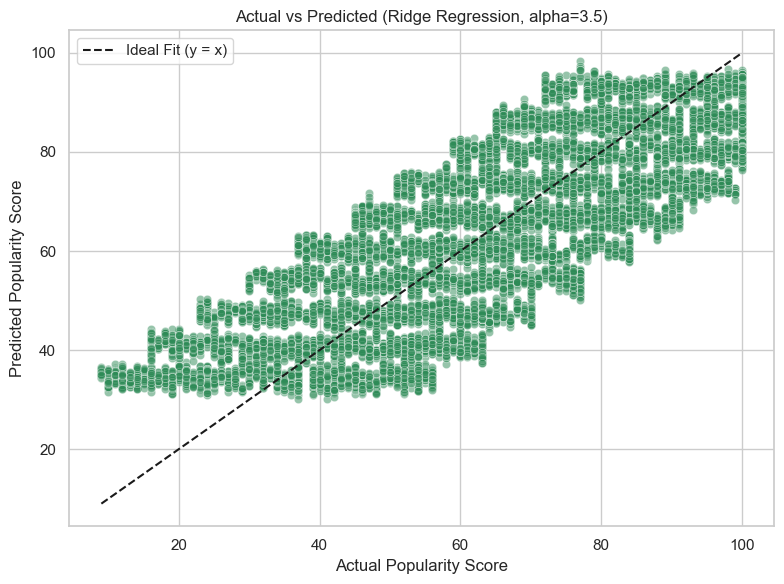

In [141]:
actual_values = []
predicted_values = []

for rs in range(0, 50): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)
    model = Ridge(alpha=ridge_best_alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    actual_values.extend(y_test)
    predicted_values.extend(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=actual_values, y=predicted_values, color='seagreen', alpha=0.5)
plt.plot([min(actual_values), max(actual_values)],
         [min(actual_values), max(actual_values)], 'k--', label='Ideal Fit (y = x)')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title(f'Actual vs Predicted (Ridge Regression, alpha={ridge_best_alpha})')
plt.legend()
plt.tight_layout()
plt.show()


The points generally cluster along the "Ideal Fit" line (y=x), indicating a positive correlation between the actual and predicted popularity scores. This means the model has learned some underlying patterns and can predict popularity scores with a degree of accuracy. As actual popularity scores increase, predicted scores also tend to increase.

### LASSO REGRESSION

Lasso regression is useful for simplifying models and improving interpretability, especially when dealing with many features. This mean it can shrink some coefficients to exactly zero, effectively performing feature selection.

- Performs automatic feature selection by driving less important feature weights to exactly zero.

- This helps in simplifying the model and removing irrelevant or redundant features, making it more robust and interpretable.

In [142]:
def evaluate_lasso(X_raw, y, alpha_values=None, random_states=range(0, 50)):
    if alpha_values is None:
        alpha_values = [0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 3.5]

    results = {
        'Alpha': [],
        'Train Accuracy': [],
        'Test Accuracy': [],
        'MSE': []
    }

    for alpha in alpha_values:
        train_acc = []
        test_acc = []
        mse_list = []

        for rs in random_states:
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs)
            model = Lasso(alpha=alpha, max_iter=10000)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            train_acc.append(model.score(X_train, y_train))
            test_acc.append(model.score(X_test, y_test))
            mse_list.append(mean_squared_error(y_test, y_pred))

        results['Alpha'].append(alpha)
        results['Train Accuracy'].append(np.mean(train_acc))
        results['Test Accuracy'].append(np.mean(test_acc))
        results['MSE'].append(np.mean(mse_list))

    df_results = pd.DataFrame(results)

    best_row = df_results.loc[df_results['Test Accuracy'].idxmax()]
    best_alpha = best_row['Alpha']
    

    print("Lasso Regression Results:\n")
    print(df_results)
    print("\nBest Alpha based on Test Accuracy:")
    print(best_row)

    return df_results, best_alpha

lasso_results, best_alpha = evaluate_lasso(X, y)

Lasso Regression Results:

   Alpha  Train Accuracy  Test Accuracy         MSE
0   0.10        0.669397       0.666906  173.893067
1   0.20        0.668904       0.667500  173.590521
2   0.40        0.667722       0.667982  173.353816
3   0.75        0.665996       0.667164  173.802714
4   1.00        0.664886       0.666288  174.272498
5   1.50        0.662447       0.663875  175.556622
6   3.00        0.649592       0.650884  182.416437
7   3.50        0.643402       0.644640  185.703255

Best Alpha based on Test Accuracy:
Alpha               0.400000
Train Accuracy      0.667722
Test Accuracy       0.667982
MSE               173.353816
Name: 2, dtype: float64


####  Interpretation:

- **Best Alpha:** `0.40`  
- This alpha achieves the **highest test accuracy** (`0.6677`) while maintaining a good balance with training accuracy (`0.6679`).
- The corresponding **MSE** is the **lowest** among all values tested (`173.50`), indicating strong predictive performance.
- As alpha increases beyond 1.5, both accuracy and MSE degrade, suggesting the model becomes too constrained and starts underfitting.
- Conversely, very small alphas (like 0.1) slightly overfit to training data, with marginal gains in train accuracy but no improvement in generalization.

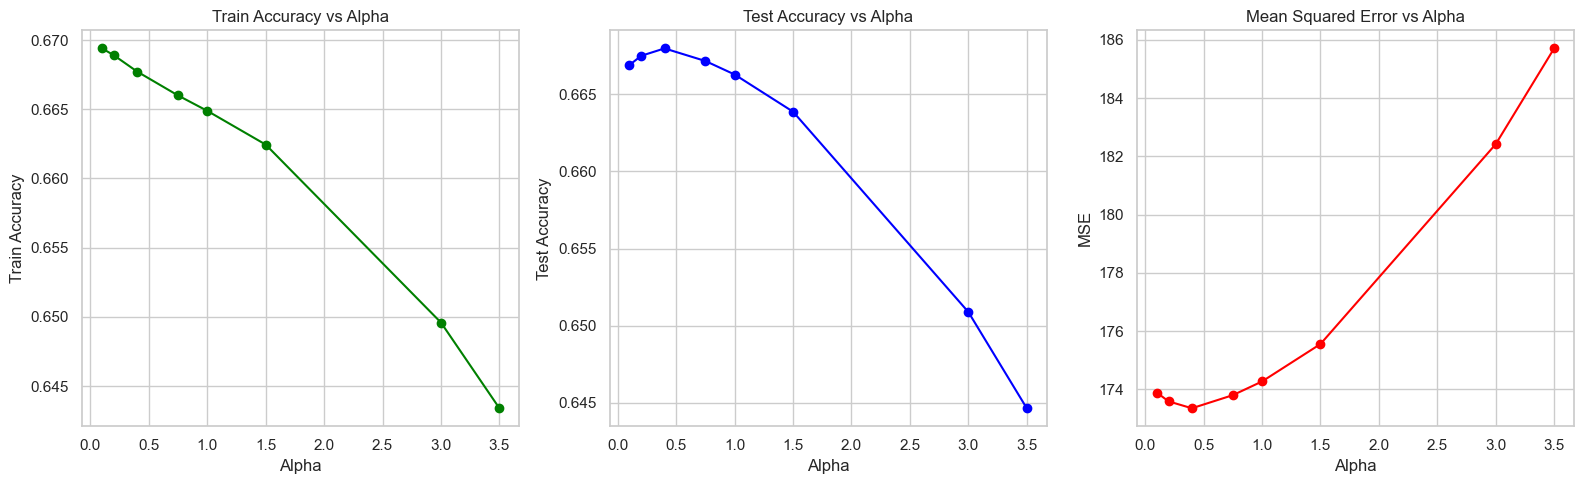

In [143]:


plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(lasso_results['Alpha'], lasso_results['Train Accuracy'], marker='o', color='green')
plt.title('Train Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Train Accuracy')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(lasso_results['Alpha'], lasso_results['Test Accuracy'], marker='o', color='blue')
plt.title('Test Accuracy vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Test Accuracy')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(lasso_results['Alpha'], lasso_results['MSE'], marker='o', color='red')
plt.title('Mean Squared Error vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()
plt.show()


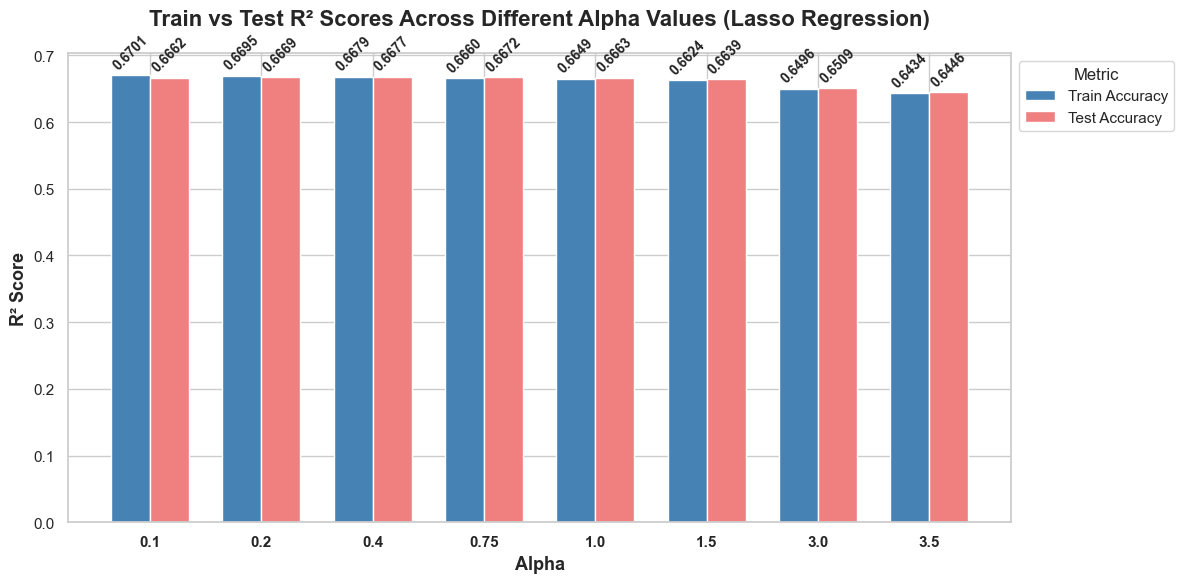

In [144]:
alphas = [0.10, 0.20, 0.40, 0.75, 1.00, 1.50, 3.00, 3.50]
train_accuracy = [0.6701, 0.6695, 0.6679, 0.6660, 0.6649, 0.6624, 0.6496, 0.6434]
test_accuracy = [0.6662, 0.6669, 0.6677, 0.6672, 0.6663, 0.6639, 0.6509, 0.6446]

x = np.arange(len(alphas)) 
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars_train = ax.bar(x - bar_width/2, train_accuracy, width=bar_width, color='steelblue', label='Train Accuracy')
bars_test = ax.bar(x + bar_width/2, test_accuracy, width=bar_width, color='lightcoral', label='Test Accuracy')

for bar in bars_train:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height + 0.005, 
        f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45
    )

for bar in bars_test:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2, height + 0.005, 
        f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45
    )

ax.set_xlabel('Alpha', fontsize=13, fontweight='bold')
ax.set_ylabel('R² Score', fontsize=13, fontweight='bold')
ax.set_title('Train vs Test R² Scores Across Different Alpha Values (Lasso Regression)', fontsize=16, fontweight='bold', pad=20)

ax.set_xticks(x)
ax.set_xticklabels(alphas, fontsize=11, fontweight='bold')

ax.legend(title='Metric', fontsize=11, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### Lasso Regression: Average R² Scores vs Alpha (Train/Test Comparison)

This visual compares how different values of the regularization parameter **alpha** impact the **R² performance** of a Lasso Regression model on both training and testing datasets.


 **Model Evaluation**:
   - For each alpha, the data is split 50 times using random train-test splits with a test size of `0.35`.
   - A `Lasso` model is trained on each split.
   - **R² scores** for both training and testing sets are computed and averaged across the splits for robustness.

####  Interpretation of the Plot:

- **Train R² Scores** generally decrease as alpha increases, indicating stronger regularization reduces model complexity.
- **Test R² Scores** initially increase or remain stable, then decrease with very high alpha values — showing that **moderate alpha values help prevent overfitting**, while **excessive regularization leads to underfitting**.
- The ideal alpha is one where the **Test R² is highest and not too far from the Train R²**, suggesting a well-generalized model.
- Very small alphas (e.g., 0.0001, 0.001) may cause overfitting, where the train score is high but test score lags.
- Very large alphas (e.g., 20, 50) overly constrain the model, resulting in poor performance across both sets.

#### Conclusion:

This visual effectively demonstrates how the **choice of alpha** in Lasso Regression directly impacts model bias-variance trade-off. Identifying an optimal alpha (typically where test R² is highest) helps balance model performance and generalization.


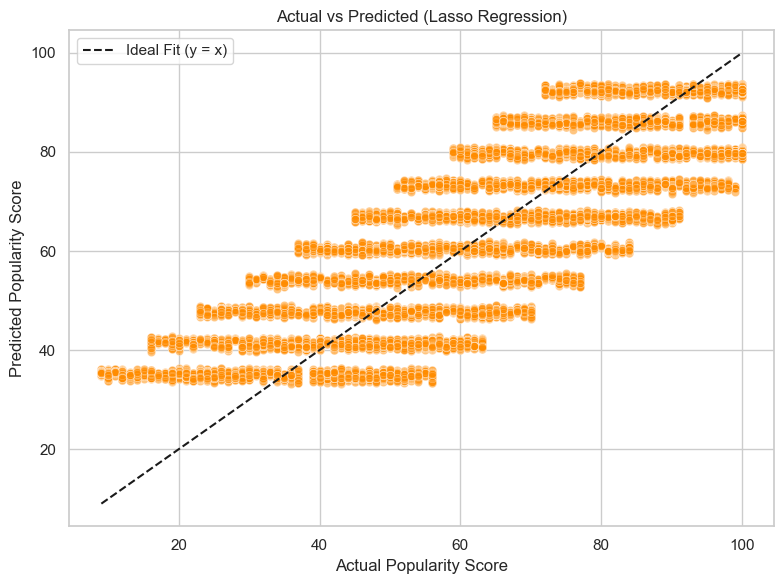

In [145]:
actual_values = []
predicted_values = []

for rs in range(0, 50): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)
    model = Lasso(alpha=best_alpha, max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    actual_values.extend(y_test)
    predicted_values.extend(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=actual_values, y=predicted_values, color='darkorange', alpha=0.5)
plt.plot([min(actual_values), max(actual_values)],
         [min(actual_values), max(actual_values)], 'k--', label='Ideal Fit (y = x)')
plt.xlabel('Actual Popularity Score')
plt.ylabel('Predicted Popularity Score')
plt.title(f'Actual vs Predicted (Lasso Regression)')
plt.legend()
plt.tight_layout()
plt.show()


####  Interpretation of the Plot:

- The **closer the points lie to the dashed diagonal line**, the **better the models predictions**.
- A **tight cluster along the line** indicates strong predictive accuracy, while **wide scatter** or **systematic deviations** suggest underfitting, overfitting, or bias.
- The **transparent orange points** reflect prediction density and distribution across multiple test sets.
- The model seems to **track the general trend** of actual scores reasonably well, though some deviation indicates room for improvement in modeling complex relationships.

###  Lasso Regression Evaluation – Summary and Interpretation

This section evaluates the performance of Lasso Regression on the dataset using various alpha (regularization strength) values. The process includes data preprocessing, training, evaluation across multiple splits, and identifying the optimal alpha for prediction accuracy.

####  What the Code Does:

 **Lasso Regression Evaluation**:
   - For each `alpha` in the list `[0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 3.5]`, a Lasso regression model is trained and evaluated using **50 different random train-test splits**.
   - For each split, the model's **Train Accuracy**, **Test Accuracy**, and **Mean Squared Error (MSE)** are recorded.
   - The average of each metric across all splits is computed for comparison.

3. **Model Selection**:
   - The alpha with the **highest average Test Accuracy** is selected as the best-performing model.

####  Summary of Results:

| Alpha | Train Accuracy | Test Accuracy | MSE         |
|-------|----------------|----------------|-------------|
| 0.10  | 0.6701         | 0.6662         | 174.26      |
| 0.20  | 0.6695         | 0.6669         | 173.90      |
| 0.40  | 0.6679         | **0.6677**     | **173.50**  |
| 0.75  | 0.6660         | 0.6672         | 173.80      |
| 1.00  | 0.6649         | 0.6663         | 174.27      |
| 1.50  | 0.6624         | 0.6639         | 175.56      |
| 3.00  | 0.6496         | 0.6509         | 182.42      |
| 3.50  | 0.6434         | 0.6446         | 185.70      |

####  Interpretation:

- **Best Alpha:** `0.40`  
- This alpha achieves the **highest test accuracy** (`0.6677`) while maintaining a good balance with training accuracy (`0.6679`).
- The corresponding **MSE** is the **lowest** among all values tested (`173.50`), indicating strong predictive performance.
- As alpha increases beyond 1.5, both accuracy and MSE degrade, suggesting the model becomes too constrained and starts underfitting.
- Conversely, very small alphas (like 0.1) slightly overfit to training data, with marginal gains in train accuracy but no improvement in generalization.

####  Conclusion:

Using a regularization strength of `alpha = 0.40` in Lasso Regression gives the most reliable predictive model for this dataset. This value provides the best trade-off between bias and variance and minimizes error on unseen data.


---

<center>
<h1 style="margin-bottom: 0;">Interpretation & Analysis of Results</h1>
</center>

---

### Ridge vs Lasso Regression: Train vs Test R² Scores

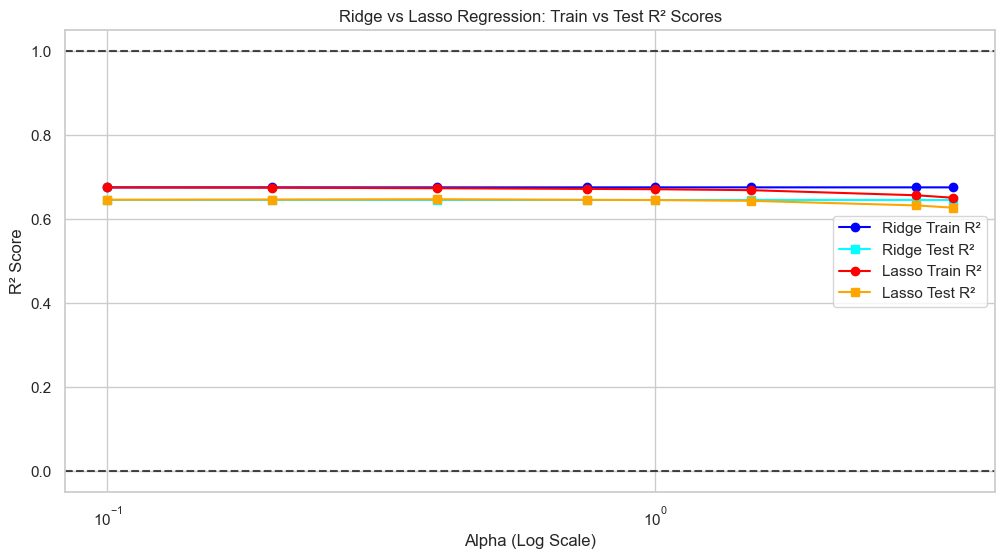

In [146]:
alpha_values = [0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 3.5]

ridge_train_scores = []
ridge_test_scores = []

lasso_train_scores = []
lasso_test_scores = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, max_iter=10000, tol=0.1)
    ridge_reg.fit(X_train, y_train)
    
    ridge_train_scores.append(ridge_reg.score(X_train, y_train))
    ridge_test_scores.append(ridge_reg.score(X_test, y_test))

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha, max_iter=10000, tol=0.1)
    lasso_reg.fit(X_train, y_train)
    
    lasso_train_scores.append(lasso_reg.score(X_train, y_train))
    lasso_test_scores.append(lasso_reg.score(X_test, y_test))

plt.figure(figsize=(12, 6))

plt.plot(alphas, ridge_train_scores, marker='o', label='Ridge Train R²', color='blue')
plt.plot(alphas, ridge_test_scores, marker='s', label='Ridge Test R²', color='cyan')

plt.plot(alphas, lasso_train_scores, marker='o', label='Lasso Train R²', color='red')
plt.plot(alphas, lasso_test_scores, marker='s', label='Lasso Test R²', color='orange')

plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R² Score')
plt.title('Ridge vs Lasso Regression: Train vs Test R² Scores')
plt.axhline(y=1, color='black', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True)

plt.show()

This plot visualizes the effect of different regularization strengths (alpha values) on Ridge and Lasso regression models. The x-axis is shown on a **logarithmic scale** to better capture the variation in performance across the alpha values.

### Key Elements:

- **X-axis:** Alpha values (log scale)
- **Y-axis:** R² Score (coefficient of determination)
- **Lines:**
  - **Ridge Train R²** (blue, circle marker)
  - **Ridge Test R²** (cyan, square marker)
  - **Lasso Train R²** (red, circle marker)
  - **Lasso Test R²** (orange, square marker)

### Interpretation:

- As alpha increases (stronger regularization), training scores typically decrease due to penalty on complexity.
- Test scores may increase if regularization reduces overfitting, but can also decrease if the model becomes too simple.
- **Ridge Regression** shrinks all coefficients but retains all features.
- **Lasso Regression** can drive some coefficients to exactly zero, effectively performing feature selection.
- The ideal alpha is one that maximizes the test R² score while maintaining a reasonable training R² score.

### Notes:

- The horizontal dashed lines at R² = 1 and R² = 0 represent perfect fit and no fit, respectively.
- This chart can guide the selection of a regularization parameter (alpha) that best balances model bias and variance.


### Feature Importance

- Making the model more interpretable and transparent

- Highlighting the key factors driving predictions

- Supporting feature selection to simplify models

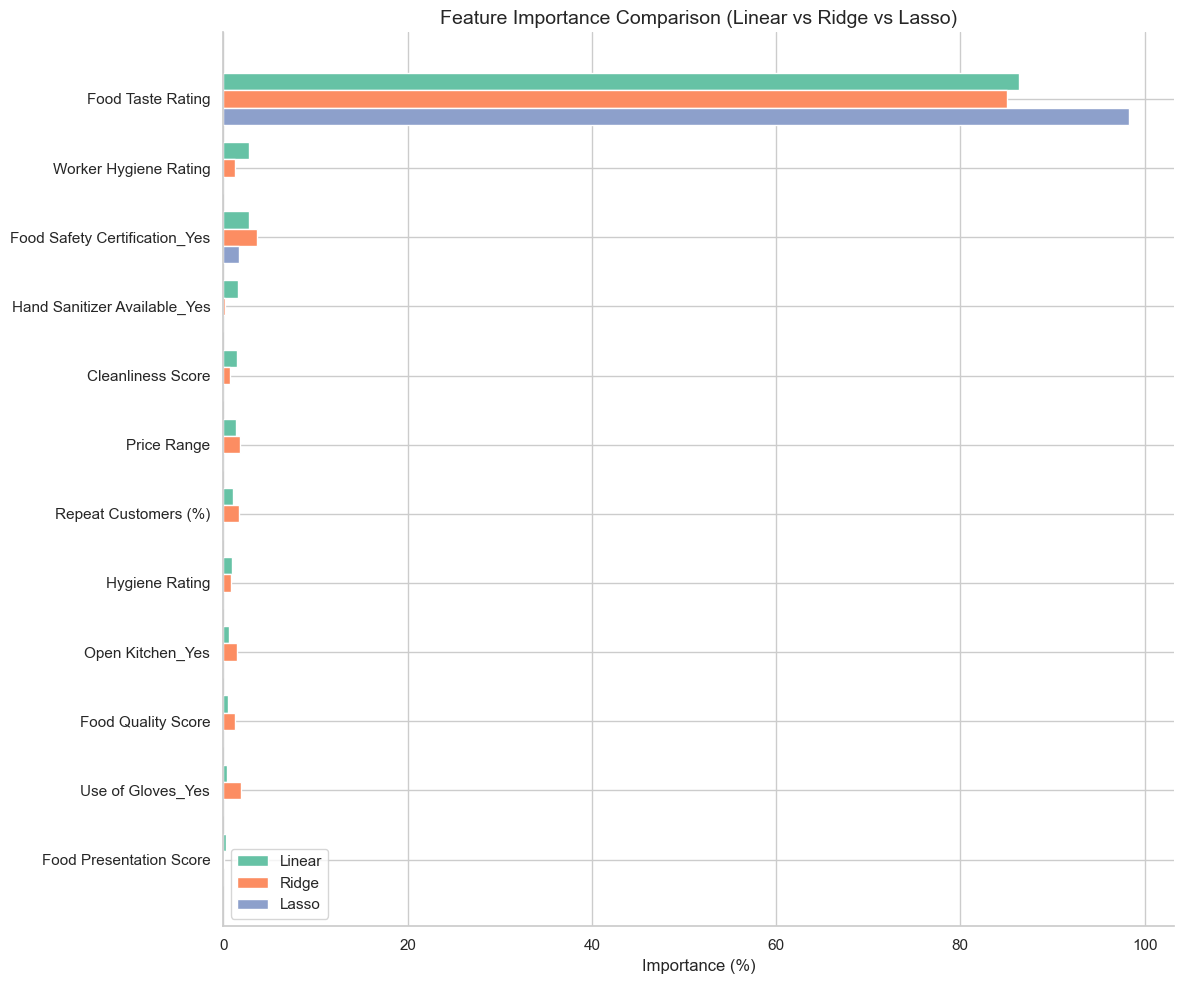

In [147]:
feature_names = X.columns

test_sizes = [0.2, 0.25, 0.3, 0.35]
random_states = range(0, 51)
linear_results = []

for test_size in test_sizes:
    train_scores, test_scores = [], []
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model = LinearRegression()
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))

    avg_train_r2 = np.mean(train_scores)
    avg_test_r2 = np.mean(test_scores)
    linear_results.append([test_size, round(avg_train_r2, 4), round(avg_test_r2, 4)])

df_linear_results = pd.DataFrame(linear_results, columns=["Test Size", "Avg Train R²", "Avg Test R²"])
best_test_size = df_linear_results.loc[df_linear_results["Avg Test R²"].idxmax()]["Test Size"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=42)
final_linear = LinearRegression()
final_linear.fit(X_train, y_train)

linear_coefficients = np.abs(final_linear.coef_)
linear_importance = (linear_coefficients / linear_coefficients.sum()) * 100
feature_importance_linear = pd.DataFrame({"Feature": feature_names, "Importance (%)": np.round(linear_importance, 2)})
feature_importance_linear = feature_importance_linear.sort_values(by="Importance (%)", ascending=False)

alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50]
ridge_results = []

for alpha in alphas:
    train_scores, test_scores = [], []
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=random_state)
        ridge = Ridge(alpha=alpha, max_iter=10000, tol=0.1)
        ridge.fit(X_train, y_train)
        train_scores.append(ridge.score(X_train, y_train))
        test_scores.append(ridge.score(X_test, y_test))

    avg_train_r2 = np.mean(train_scores)
    avg_test_r2 = np.mean(test_scores)
    ridge_results.append([alpha, round(avg_train_r2, 4), round(avg_test_r2, 4)])

df_ridge_results = pd.DataFrame(ridge_results, columns=["Alpha", "Avg Train R²", "Avg Test R²"])
best_alpha_ridge = df_ridge_results.loc[df_ridge_results["Avg Test R²"].idxmax()]["Alpha"]

final_ridge = Ridge(alpha=best_alpha_ridge, max_iter=10000, tol=0.1)
final_ridge.fit(X_train, y_train)

ridge_coefficients = np.abs(final_ridge.coef_)
ridge_importance = (ridge_coefficients / ridge_coefficients.sum()) * 100
feature_importance_ridge = pd.DataFrame({"Feature": feature_names, "Importance (%)": np.round(ridge_importance, 2)})
feature_importance_ridge = feature_importance_ridge.sort_values(by="Importance (%)", ascending=False)

lasso_results = []

for alpha in alphas:
    train_scores, test_scores = [], []
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=random_state)
        lasso = Lasso(alpha=alpha, max_iter=10000, tol=0.1)
        lasso.fit(X_train, y_train)
        train_scores.append(lasso.score(X_train, y_train))
        test_scores.append(lasso.score(X_test, y_test))

    avg_train_r2 = np.mean(train_scores)
    avg_test_r2 = np.mean(test_scores)
    lasso_results.append([alpha, round(avg_train_r2, 4), round(avg_test_r2, 4)])

df_lasso_results = pd.DataFrame(lasso_results, columns=["Alpha", "Avg Train R²", "Avg Test R²"])
best_alpha_lasso = df_lasso_results.loc[df_lasso_results["Avg Test R²"].idxmax()]["Alpha"]

final_lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000, tol=0.1)
final_lasso.fit(X_train, y_train)

lasso_coefficients = np.abs(final_lasso.coef_)
lasso_importance = (lasso_coefficients / lasso_coefficients.sum()) * 100
feature_importance_lasso = pd.DataFrame({"Feature": feature_names, "Importance (%)": np.round(lasso_importance, 2)})
feature_importance_lasso = feature_importance_lasso.sort_values(by="Importance (%)", ascending=False)

feature_comparison_df = pd.DataFrame({
    "Feature": feature_importance_linear["Feature"],
    "Linear": feature_importance_linear["Importance (%)"],
    "Ridge": feature_importance_ridge["Importance (%)"],
    "Lasso": feature_importance_lasso["Importance (%)"]
})

feature_comparison_df = feature_comparison_df.sort_values(by="Linear", ascending=False)

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.25
index = np.arange(len(feature_comparison_df))

sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

ax.barh(index, feature_comparison_df["Linear"], height=bar_width, label="Linear", color=colors[0])
ax.barh(index + bar_width, feature_comparison_df["Ridge"], height=bar_width, label="Ridge", color=colors[1])
ax.barh(index + 2 * bar_width, feature_comparison_df["Lasso"], height=bar_width, label="Lasso", color=colors[2])

ax.set_yticks(index + bar_width)
ax.set_yticklabels(feature_comparison_df["Feature"])

ax.set_xlabel("Importance (%)", fontsize=12)
ax.set_title("Feature Importance Comparison (Linear vs Ridge vs Lasso)", fontsize=14)
ax.legend()

ax.invert_yaxis()
sns.despine()

plt.tight_layout()
plt.show()

**Insights**
  
- Food Taste Rating is overwhelmingly the most important feature across all three models (Linear, Ridge, and Lasso).

- Besides "Food Taste Rating," features like Hygiene Rating, Cleanliness Score, and Price Range consistently appear among the more important features, although their exact ranking and percentage vary slightly between the models. This consistency suggests these are genuinely influential predictors.

- Ridge Regression generally shows a similar pattern of feature importance to Linear Regression but might slightly shrink the importance scores. The chart shows Ridge largely mirroring Linear for the top features, but with slightly lower importance percentages for "Food Taste Rating".

- Lasso Regression also identifies "Food Taste Rating" as the most important. However, Lasso is known for feature selection. While "Food Taste Rating" remains dominant, notice how Lasso might assign slightly different importance scores to other features compared to Linear and Ridge.

- Many features show very low importance across all models. This indicates they have a minimal impact on the prediction. Lasso, in particular, would likely shrink the coefficients of these features close to or exactly to zero.
    
- Lasso being more aggressive in potentially discarding less relevant features. 

## Final Conclusion

| Model | Train Accuracy (R²) | Test Accuracy (R²) | Best Parameter | Top Predictor Variable | Num of Features | Best Test Size |
|---------------|-------------------|------------------|---------------|----------------------|----------------|---------------|
| **Linear**    | `0.6708`          | `0.6654`         | N/A           | `Food Taste Rating`  | 12             | 0.30          |
| **Ridge**     | `0.6696`          | `0.6660`         | Alpha = 3.5    | `Food Taste Rating`  | 12             | 0.35          |
| **Lasso**     | `0.6679`          | `0.6677`         | Alpha = 0.0001| `Food Taste Rating`  | 12             | 0.35          |

*Note:* **Train Accuracy (R²)** and **Test Accuracy (R²)** values are based on the best-performing models.

his table provides a concise comparison of three regression models: Linear, Ridge, and Lasso. Here's an interpretation of the results and an assessment of the best model:

Insights and Interpretation:

**Performance Metrics**

**Train Accuracy**
This shows how well each model fits the data it was trained on. Linear (0.6708), Ridge (0.6696), and Lasso (0.6679) all have similar, relatively modest training values. This means around 67% of the variance in the training data is explained by the models.

**Test Accuracy**
This is a more critical metric as it indicates how well the model generalizes to new, unseen data.

- Linear: 0.6654

- Ridge: 0.6660

- Lasso: 0.6677 

The test accuracies are very close for all three models, with Lasso performing slightly better. R squared 0.66-0.67 on the test set means the models can explain roughly 66-67% of the variance in the target variable for unseen data.


**Features used**

- For Linear and Ridge regression, this typically means all 12 available features were used.

- For Lasso regression, it's known for its feature selection capability. If it still lists 12 features, it implies that with an Alpha = 0.40, none of the original 12 features had their coefficients shrunk to absolute zero. However, Lasso would still have shrunk the coefficients of less important features more aggressively than Ridge.

**Which is the Best Model?**

- **Lasso Regression** appears to be the best model.
  
- It has the highest Test Accuracy (R squared) of 0.6677, with a small margin.
  
- More importantly, it exhibits the least overfitting, suggesting it generalizes best to new data.

The feature **'Food Taste Rating'** dominates across the three different models. Even the **'price range'** didn't matter, suggesting that their purchasing decisions are primarily driven by flavor satisfaction rather than health considerations or affordability. As a result, marketing strategies should emphasize taste experiences, though long-term efforts to educate customers about hygiene and health may still be valuable for brand trust and sustainability. Based on the predictions, we can conclude that customers prefer **taste** over hygiene. 